# Seaborn - Distribution Plots

* Tópicos:
    * distplot  (pdf of a variable)
    * jointplot (combines two displots, and a graph in the middle)
    * pairplot  (pair pdfs, combining each variable)
    * rugplot   (dash mark for each point in a univariate distribution)
    * kdeplot   (Kernel Density Estimator)

In [13]:
# Import Libraries

import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Import Data

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


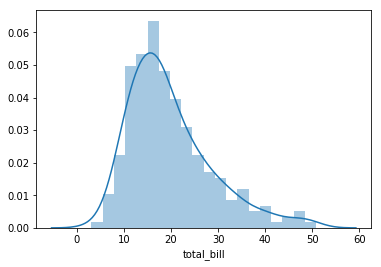

In [14]:
# Distplot

# kde = shows density estimation of data (True or False)
# bins = number of 'spaces' for data division

sns.distplot(tips['total_bill'], bins=20, kde=True)

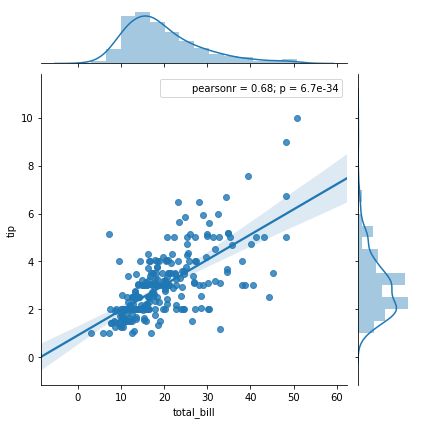

In [15]:
# Joint Plot

# data = which dataframe / x,y = which collumn will be plot
# kind = type of plot (“scatter”  / “reg” / “resid” / “kde” / “hex”)

sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

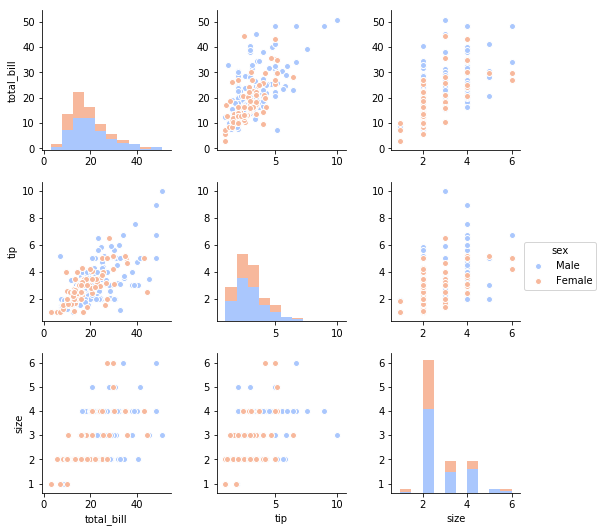

In [16]:
# Pair plot

# data = which dataframe
# hue = for each value of this variable, a different color 
# (good for classification datasets)
# pallete = color pallete

sns.pairplot(data=tips,hue='sex',palette='coolwarm')

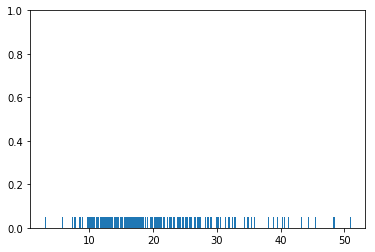

In [17]:
# Rug Plot

sns.rugplot(tips['total_bill'])

(0, 1)

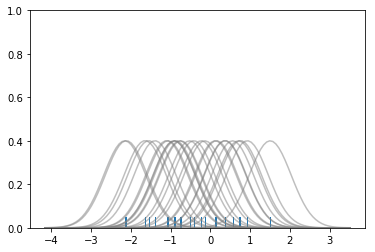

In [20]:
# Kernel Density Estimation 1: Basis Functions

# https://en.wikipedia.org/wiki/Kernel_density_estimation#Pratical_estimation_of_the_bandwidth

# Create normal random dataset
dataset = np.random.randn(25)

# Create rugplot
sns.rugplot(dataset);

# Config Axis
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points between x_min and x_max
x_axis = np.linspace(x_min,x_max,100)

# Config bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create a kernel list
kernel_list = []

# Basis functions
for data_point in dataset:
    
    # Create kernel for each point
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Adjust scale
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

# Plot graphic
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

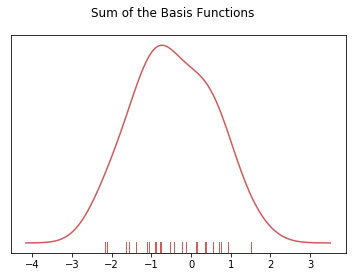

In [21]:
# Kernel Density Estimation 2: Obtain Distribution

# Sum of basis functions
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Erase y-ticks
plt.yticks([])

# Define title
plt.suptitle("Sum of the Basis Functions")

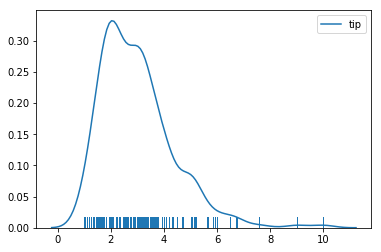

In [22]:
# Kernel Density Estimation 3: from dataset

sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])